In [10]:
#imports all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("temp.csv")
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [12]:
df=df.set_index('Date')

In [13]:
df = df.rename(columns={'Daily minimum temperatures': 'Temperature'})

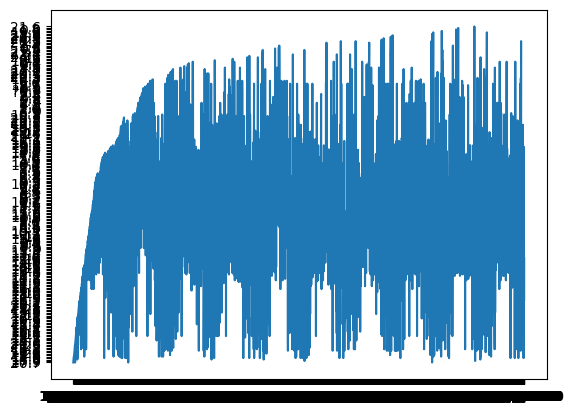

In [14]:
plt.plot(df['Temperature'])
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1/1/1981 to 12/31/1990
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB


In [16]:
# Replace non-numeric values with NaN
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df = df.interpolate(method='linear', axis=0)
df['Temperature'] = df['Temperature'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1/1/1981 to 12/31/1990
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Temperature'])

# Print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.440522006557913
p-value: 0.00025147236020337557
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [21]:
if result[1] < 0.05 and result[0] < result[4]['5%']:
    print('The time series is stationary')
else:
    print('The time series is not stationary')

The time series is stationary


In [22]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
# Perform ARIMA modeling
arima_model = ARIMA(train_data['Temperature'], order=(2, 1, 0)).fit()
arima_pred = arima_model.forecast(len(test_data))
arima_mae = mean_absolute_error(test_data['Temperature'], arima_pred)
arima_rmse = np.sqrt(mean_squared_error(test_data['Temperature'], arima_pred))
print('ARIMA MAE: {:.2f}'.format(arima_mae))
print('ARIMA RMSE: {:.2f}'.format(arima_rmse))

C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA MAE: 3.94
ARIMA RMSE: 4.82


C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
BaseLine=df['Temperature'].mean()

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1/1/1989 to 12/31/1990
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  730 non-null    float64
dtypes: float64(1)
memory usage: 27.6+ KB


In [33]:
# Create a DataFrame for predictions with a datetime index
predictions = pd.DataFrame(index=df.index)

# Set the predicted values to the mean value
predictions['baseline'] = BaseLine
predictions=predictions.iloc[:730, :]
# Calculate the MAE and RMSE
mae = mean_absolute_error(test_data['Temperature'], predictions['baseline'])
rmse = mean_squared_error(test_data['Temperature'], predictions['baseline'], squared=False)

# Print the MAE and RMSE
print('MAE:', mae)
print('RMSE:', rmse)

MAE: 3.3973824732595235
RMSE: 4.113780156569013
